In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# MACD Histogram Gradient Indicator

In [2]:
import pandas as pd
import mplfinance as mpf

In [3]:
infile = 'data/nse:tcs.csv'

#Data Used In This Example
df = pd.read_csv(infile, index_col=0, parse_dates=True)

# Formula Used For Calculation
# Get the 26-day EMA of the closing price
k = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
# Get the 12-day EMA of the closing price
d = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d
# Get the 9-Day EMA of the MACD for the Trigger line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s

# Add all of our new values for the MACD to the dataframe
# df['MACD_12_26_9'] = df.index.map(macd)
# df['MACDh_12_26_9'] = df.index.map(macd_h)
# df['MACDs_12_26_9'] = df.index.map(macd_s)

df['MACD_12_26_9'] = macd
df['MACDh_12_26_9'] = macd_h
df['MACDs_12_26_9'] = macd_s

# start the dataframe at the begining of the longest EMA:
df = df.iloc[(26+9):,:]

In [4]:
def gen_macd_color(df):
    macd_color = []
    macd_color.clear()
    for i in range (0,len(df["MACDh_12_26_9"])):
        if df["MACDh_12_26_9"][i] >= 0 and df["MACDh_12_26_9"][i-1] < df["MACDh_12_26_9"][i]:
            macd_color.append('#26A69A')
            #print(i,'green')
        elif df["MACDh_12_26_9"][i] >= 0 and df["MACDh_12_26_9"][i-1] > df["MACDh_12_26_9"][i]:
            macd_color.append('#B2DFDB')
            #print(i,'faint green')
        elif df["MACDh_12_26_9"][i] < 0 and df["MACDh_12_26_9"][i-1] > df["MACDh_12_26_9"][i] :
            #print(i,'red')
            macd_color.append('#FF5252')
        elif df["MACDh_12_26_9"][i] < 0 and df["MACDh_12_26_9"][i-1] < df["MACDh_12_26_9"][i] :
            #print(i,'faint red')
            macd_color.append('#FFCDD2')
        else:
            macd_color.append('#000000')
            #print(i,'no')
    return macd_color

In [5]:
macd      = df['MACD_12_26_9']
histogram = df['MACDh_12_26_9']
signal    = df['MACDs_12_26_9']

In [6]:
macd_color = gen_macd_color(df)

In [7]:
apds = [mpf.make_addplot(macd,color='#2962FF', panel=1),
        mpf.make_addplot(signal,color='#FF6D00', panel=1),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1, color=macd_color,alpha=1,secondary_y=True),
       ]

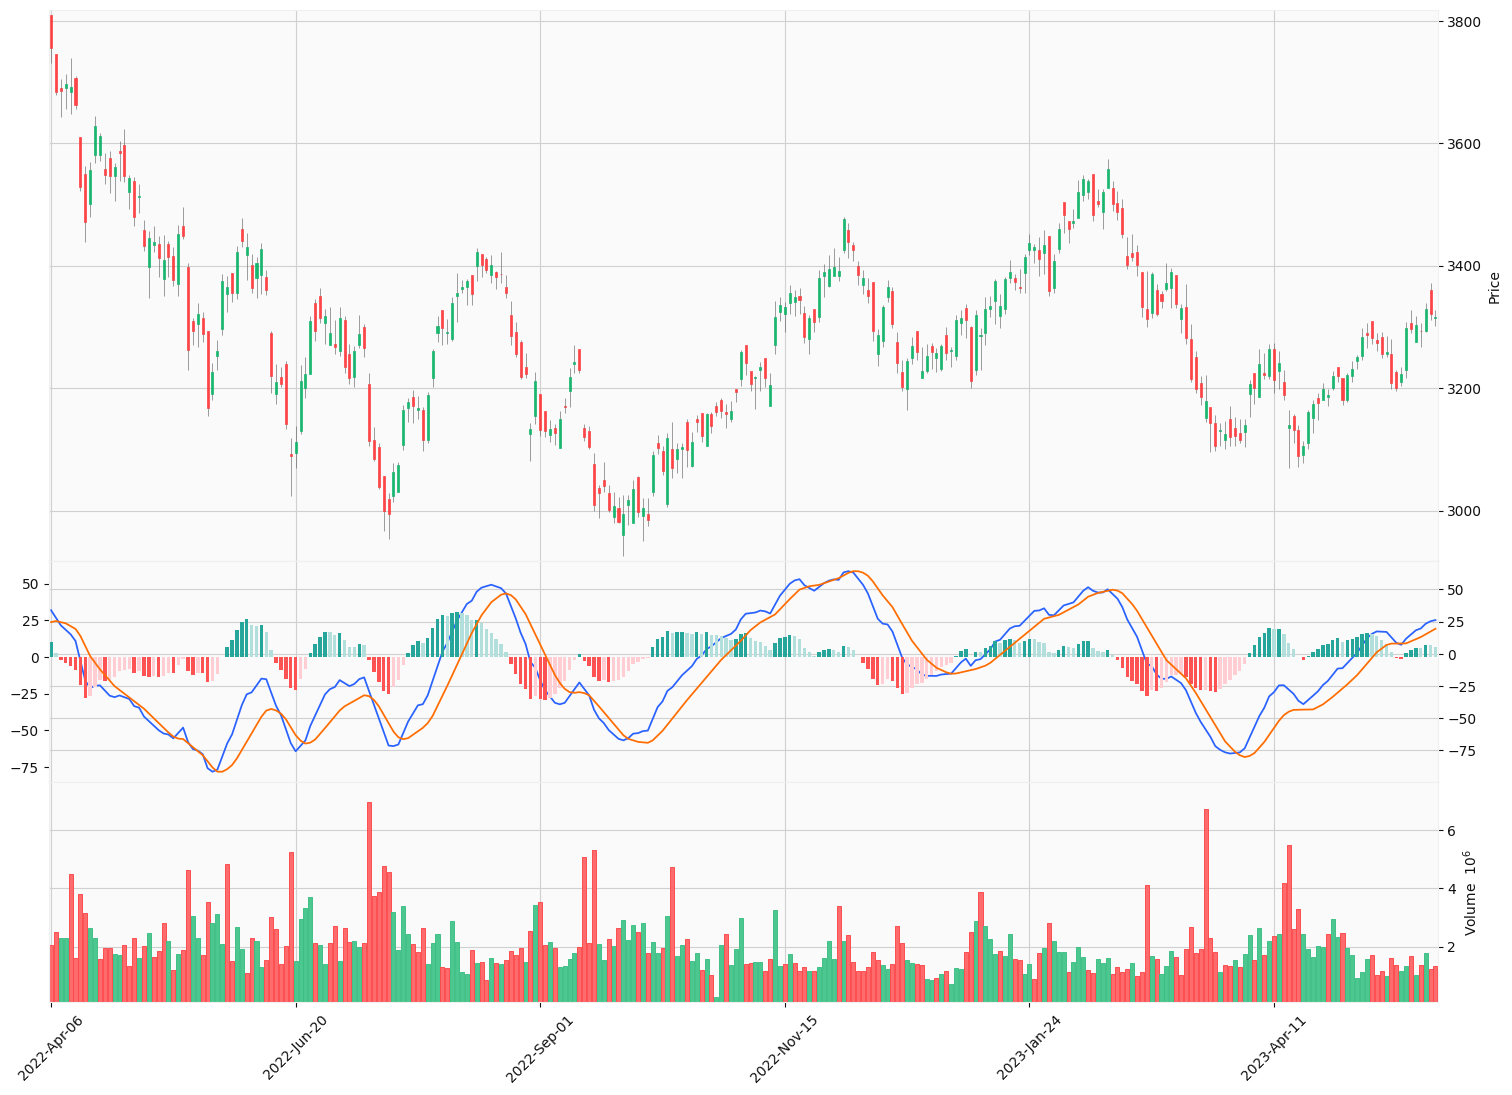

In [8]:
mpf.plot(df,
         volume=True,
         type="candle", 
         style="yahoo",
         addplot=apds,
         volume_panel=2,
         figscale=2,
         tight_layout=True
        )